In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N, D_in, H, D_out = 2, 100, 50, 1

In [ ]:
x = np.random.randn(N, D_in)    # 내가 만들어낸 input값
y = np.random.randn(N, D_out)   # 정답지
# x 값을 보냈을 때 뉴런 세포 100개, 50개로 규칙성을 찾아서 y가 나오게 해라.
print(x.shape)
print(y.shape)
print(x)
print('=======')
print(y)

(2, 100)
(2, 1)
[[ 0.49208743  2.12244064  0.17305079 -1.04844551 -0.51646702  0.51175976
  -1.38205951  0.61736472 -0.2905449  -0.73640428  0.67594554 -0.04291056
   1.38285428  0.86140317 -0.76041003  1.44172621  0.49876562 -0.25685901
  -0.62850338  0.56748816  1.1326207  -0.31342965  0.59600384 -1.32915525
  -0.24350791 -0.43299938 -1.51437069 -0.41457458  0.27970767 -0.36552104
   0.19019248 -1.42760844  2.45697454 -0.35970275  0.1288377  -0.95337899
   0.96297317  0.25043668 -0.84113925  0.34786641 -1.50434499  0.06359985
   1.20529964 -1.75332645  0.13056679  0.00916276  1.13992423  1.08410724
  -2.16156479 -1.79324506  0.66637503 -0.45441596 -1.50904451 -0.11876552
   0.13197853 -0.18643061  0.31015131 -0.84333223  1.35633894  0.06302583
  -0.19555731 -0.51532022 -0.03765015 -0.94895363  0.6005092  -1.61248
  -2.23770956 -2.00251942 -1.31080391  0.22419675 -1.02666697  0.20089962
  -0.68486473  0.87208704 -0.86489746 -1.08187425 -0.51701989  1.36698269
  -2.14807207 -1.35109268

In [ ]:
w1 = np.random.randn(D_in, H)   # 뉴런(뇌세포1) (가중치) 뇌세포 100개 * 50개를
w2 = np.random.randn(H, D_out)  # 뉴런(뇌세포2) 1개로 줄여주도록

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [ ]:
# 학습 코드
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):      # 뇌세포 w1을 지나고 w2 를 반복하면서 규칙을 찾도록.
  h = x.dot(w1)
  h_relu = np.maximum(h, 0)
  y_pred = h_relu.dot(w2)
  y_pred_list.append(y_pred[0][0])

  loss = np.square(y_pred - y).sum()
  loss_list.append(loss)
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h_relu.T.dot(grad_y_pred)
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[h < 0] = 0
  grad_w1 = x.T.dot(grad_h)

  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

0 1831.1880565611375
1 1795.7100192504304
2 1760.9260515725905
3 1726.8223047817687
4 1693.3852171598253
5 1660.6015076521326
6 1628.4581696600803
7 1596.942464985939
8 1566.0419179258145
9 1535.7443095064575
10 1506.0376718620796
11 1476.9102827470854
12 1448.3506601811705
13 1420.3475572230036
14 1392.8899568690417
15 1366.0165076634075
16 1339.7946289224558
17 1314.0798239732271
18 1288.862138567569
19 1264.1318197010823
20 1239.879311319359
21 1216.0952501242803
22 1192.7704614778208
23 1169.8959554006929
24 1147.462922663474
25 1125.462730967685
26 1103.8869212145805
27 1082.7272038593135
28 1061.975455348335
29 1041.6237146378244
30 1021.6641797911523
31 1002.0892046533113
32 982.8912956003899
33 964.063108362178
34 945.5974449160879
35 927.4872504505585
36 909.7256103962716
37 892.3057475234123
38 875.2210191034324
39 858.4649141336254
40 842.0310506230464
41 825.9131729382125
42 810.1051492071871
43 794.600968780534
44 779.3947397478889
45 764.4806865086588
46 749.85314739568
4

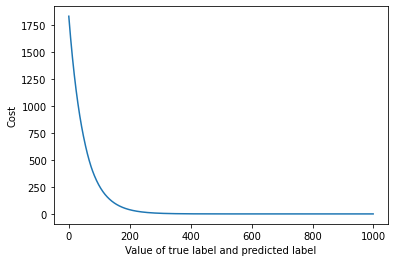

In [ ]:
step_list = [i for i in range(len(loss_list))]    # 현직에서 한줄 if문, for문 많이 사용됨.
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()